# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, fbeta_score, roc_curve
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [2]:
# https://drive.google.com/file/d/1O5jbzGheFlzaM9xQf9Mk7tILi6TlAamI
! gdown --id 1O5jbzGheFlzaM9xQf9Mk7tILi6TlAamI

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1O5jbzGheFlzaM9xQf9Mk7tILi6TlAamI
To: /content/creditcard.csv
100% 151M/151M [00:01<00:00, 111MB/s]


In [3]:
data = pd.read_csv('creditcard.csv').drop(['Time'], axis = 1) #уберем время относительно первой транзакции, потому что это не фича

In [4]:
data.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [6]:
from collections import Counter
Counter(data['Class'])

Counter({0: 284315, 1: 492})

Датасет сильно разбалансирован, но хотя бы заполнен данными целиком. \
Проведем еще нормализацию данных перед обучением.

In [7]:
scaler = MinMaxScaler()
data=pd.DataFrame(scaler.fit_transform(data),
            columns=data.columns, index=data.index) 

In [8]:
data.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0


In [9]:
corr = data.corr()
corr[(corr > 0.7) & (corr != 1.0)].max(axis = 1).max(axis = 0)

nan

Значимых корреляций данных не обнаружено

In [10]:
X = data.drop(['Class'], axis = 1)
y = data['Class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [12]:
y_pred_const = np.zeros(len(X_test))
y_pred_proba_const = y_pred_const

In [13]:
LogReg = LogisticRegression(max_iter= 1000)
LogReg.fit(X_train, y_train)

y_pred_logreg = LogReg.predict(X_test)
y_pred_proba_logreg = LogReg.predict_proba(X_test)[:, 1]


In [14]:
KNN = KNeighborsClassifier(leaf_size = 150)
KNN.fit(X_train, y_train)

y_pred_knn = KNN.predict(X_test)
y_pred_proba_knn = KNN.predict_proba(X_test)[:, 1]

Показатели качества логистической регрессии:


In [15]:
print('LogReg accuracy score: ', accuracy_score(y_test, y_pred_logreg))
print('LogReg precision score: ', precision_score(y_test, y_pred_logreg))
print('LogReg recall score: ', recall_score(y_test, y_pred_logreg))
print('LogReg f1 score: ', f1_score(y_test, y_pred_logreg))
print('LogReg ROC AUC score: ', roc_auc_score(y_test, y_pred_proba_logreg))

LogReg accuracy score:  0.9990988144142879
LogReg precision score:  0.8470588235294118
LogReg recall score:  0.5294117647058824
LogReg f1 score:  0.6515837104072398
LogReg ROC AUC score:  0.9848495296227673


А теперь показатели качества KNN:

In [16]:
print('KNN accuracy score: ', accuracy_score(y_test, y_pred_knn))
print('KNN precision score: ', precision_score(y_test, y_pred_knn))
print('KNN recall score: ', recall_score(y_test, y_pred_knn))
print('KNN f1 score: ', f1_score(y_test, y_pred_knn))
print('KNN ROC AUC score: ', roc_auc_score(y_test, y_pred_proba_knn))

KNN accuracy score:  0.9995318516437859
KNN precision score:  0.9
KNN recall score:  0.7941176470588235
KNN f1 score:  0.84375
KNN ROC AUC score:  0.9336875585687403


In [17]:
print('ConstModel accuracy score: ', accuracy_score(y_test, y_pred_const))
print('ConstModel precision score: ', precision_score(y_test, y_pred_const))
print('ConstModel recall score: ', recall_score(y_test, y_pred_const))
print('ConstModel f1 score: ', f1_score(y_test, y_pred_const))
print('ConstModel ROC AUC score: ', roc_auc_score(y_test, y_pred_proba_const))

ConstModel accuracy score:  0.9984082955888721
ConstModel precision score:  0.0
ConstModel recall score:  0.0
ConstModel f1 score:  0.0
ConstModel ROC AUC score:  0.5


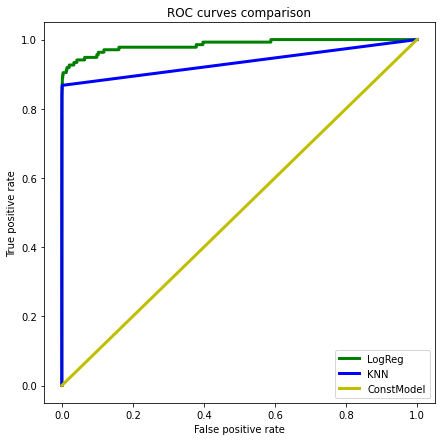

In [18]:
plt.figure(figsize = (7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logreg)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
fpr_const, tpr_const, thresholds_const = roc_curve(y_test, y_pred_proba_const)
plt.plot(fpr, tpr, 'g', linewidth = 3)
plt.plot(fpr_knn, tpr_knn, 'b', linewidth = 3)
plt.plot(fpr_const, tpr_const, 'y', linewidth = 3)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(['LogReg', 'KNN', 'ConstModel'])
plt.title('ROC curves comparison')
plt.show()

Иии, в данном случае KNN одерживает победу по большинству параметров(возможно за счет количества листов leaf_size,\
 а также плохого подбора гиперпараметров логистической регрессии) \
 Однако ROC AUC score (который рекомендуется для оценки точности этого датасета на kaggle) выше все-таки у LogReg-модели

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

### *Рассуждения* 
Исходя из такой постановки задачи, важно, чтобы автоматическая блокировка пользователей давала как можно меньше False Positive результатов, то есть чтобы обычные пользователи блокировались как можно реже. Иначе это снижает доверие к банку.\
С другой стороны, желательно также не пропускать слишком много мошеннических транзакций. \
\
Таким образом, можно попробовать улучшить метрику $F_{\beta}$ score. \
При этом пусть $\beta = 0.4$, чтобы больший вес имел показатель precision, и среди забаненных пользователей почти не было не-мошенников.

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

### Для логистической регрессии

Посмотрим, чему этот показатель (fbeta_score) равен изначально.

In [19]:
fbeta_score(y_test, y_pred_logreg, beta = 0.4)

0.7823154739602849

1. Посмотрим на веса регрессии и попробуем убрать фичи с малыми весами.

In [20]:
print('Intercept: ', LogReg.intercept_[0])
print('Coefs: ', LogReg.coef_[0])

Intercept:  8.500662923111143
Coefs:  [  0.22632903   0.39388952  -1.256898     7.73204855   1.06423989
  -0.92839131  -0.62556425  -1.45150447  -2.27517532  -3.33940385
   4.72432529  -6.15035023  -1.71804006 -11.0091785   -0.47489443
  -3.13723517  -1.97516841  -0.22166327  -0.08255337   0.28377638
   1.12120141   0.69991434  -0.25369864  -0.7781486   -0.88583687
   0.47700483  -0.51064513   0.09944193  -0.33460337]


In [21]:
coefs = LogReg.coef_[0]
bad = np.argwhere(abs(coefs) < 0.3)
X1 = X.drop(X.columns[bad.reshape(-1)], axis = 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.3, random_state = 42)

In [22]:
LogReg1 = LogisticRegression(max_iter= 1000)
LogReg1.fit(X1_train, y1_train)

y_pred_logreg1 = LogReg1.predict(X1_test)

In [23]:
fbeta_score(y1_test, y_pred_logreg1, beta = 0.4)

0.7823154739602849

Почему-то результат не изменился вообще (

2. Преобразования с датасетом выполнялись выше (нормализация, проверка на заполненность и корреляцию данных, а также исключение фич). Поэтому дальше будет только подбор гиперпараметров.

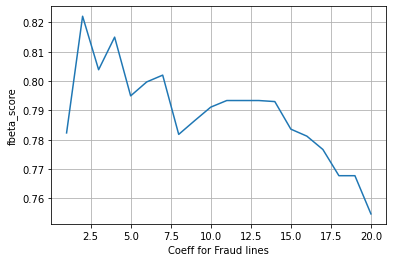

In [24]:
# сначала попробуем подобрать веса классов
f_betas = []
weights = np.arange(1, 21)
for i in weights:
  log_reg = LogisticRegression(class_weight = {0:1, 1:i}, max_iter=1000)
  log_reg.fit(X_train, y_train)

  y_pred = log_reg.predict(X_test)
  f_betas.append(fbeta_score(y_test, y_pred, beta = 0.4))

plt.plot(weights, f_betas)
plt.xlabel('Coeff for Fraud lines')
plt.ylabel('fbeta_score')
plt.grid()
plt.show()

Как оказалось, **хороший результат достигается при коэффициенте 2**. \
Попробуем теперь менять max_iter, например:

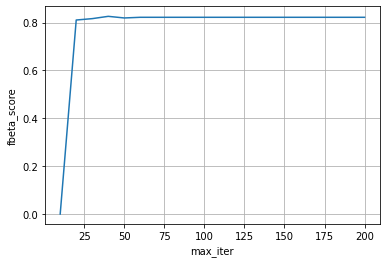

In [25]:
f_betas = []
iters = np.arange(10, 201, 10)
for i in iters:
  log_reg = LogisticRegression(class_weight = {0:1, 1:2}, max_iter=i)
  log_reg.fit(X_train, y_train)

  y_pred = log_reg.predict(X_test)
  f_betas.append(fbeta_score(y_test, y_pred, beta = 0.4))

plt.plot(iters, f_betas)
plt.xlabel('max_iter')
plt.ylabel('fbeta_score')
plt.grid()
plt.show()

Ккак видим, **max_iter, начиная от показателя 20, не влияет на результат**.\
Чуть лучше показатель при 40, но это значение мало отличается от постоянного значения при всех max_iter более 20

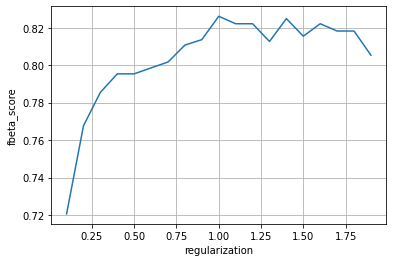

In [26]:
f_betas = []
regularization = np.arange(0.1, 2, 0.1)
for i in regularization:
  log_reg = LogisticRegression(class_weight = {0:1, 1:2}, max_iter=40, C = i)
  log_reg.fit(X_train, y_train)

  y_pred = log_reg.predict(X_test)
  f_betas.append(fbeta_score(y_test, y_pred, beta = 0.4))

plt.plot(regularization, f_betas)
plt.xlabel('regularization')
plt.ylabel('fbeta_score')
plt.grid()
plt.show()

Видим, что **коэффициент С для регуляризации по умолчанию подобран хорошо** (равен 1)

In [27]:
log_reg = LogisticRegression(class_weight = {0:1, 1:2}, max_iter=40)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
fbeta_score(y_test, y_pred, beta = 0.4)

0.8261013580655849

Таким образом, **лучшая LogReg модель имеет fbeta_score = 0.826** \
Это достигается при увеличении веса Fraud-строк в 2 раза, а также слегка улучшается изменением максимального числа итераций.

### Для KNN:

Посмотрим, чему этот показатель (fbeta_score) равен изначально.




In [28]:
fbeta_score(y_test, y_pred_knn, beta = 0.4)

0.8837471783295714

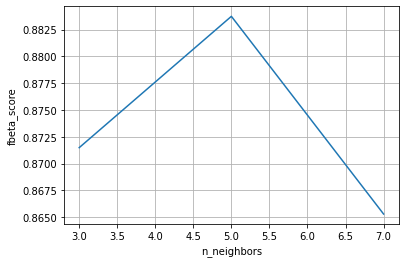

In [29]:
# сначала попробуем подобрать число соседей
f_betas = []
neigh = np.arange(3, 9, 2)
for i in neigh:
  KNN = KNeighborsClassifier(n_neighbors=i, leaf_size=150)
  KNN.fit(X_train, y_train)

  y_pred = KNN.predict(X_test)
  f_betas.append(fbeta_score(y_test, y_pred, beta = 0.4))

plt.plot(neigh, f_betas)
plt.xlabel('n_neighbors')
plt.ylabel('fbeta_score')
plt.grid()
plt.show()

Как видно из графика, оптимальное число соседей в данном случае равно 5.

Попробуем веса соседей менять в зависимости от расстояния до них

In [30]:
KNN = KNeighborsClassifier(leaf_size=150, weights = 'distance')
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)
fbeta_score(y_test, y_pred, beta = 0.4)

0.8861343326607092

Это чуть-чуть улучшило результат

Таким образом, **лучшая KNN-модель имеет fbeta_score = 0.886** \
Это достигается при введении весов соседей, пропорциональных расстоянию, вместо константных. \
Модель имеент fbeta_score выше чем LogReg, но работает очень долго.

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

### Описание датасета
[Body performance Data](https://www.kaggle.com/datasets/kukuroo3/body-performance-data) \
Датасет с данными по физическим показателям различных людей \
Целевая переменная - класс производительности человека: (A, B, C, D; где А - лучший)

In [31]:
# https://drive.google.com/file/d/1-3D8yCB9-XLpl-97pETPA9mVP0M0NEO5/view?usp=sharing
! gdown --id 1-3D8yCB9-XLpl-97pETPA9mVP0M0NEO5

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-3D8yCB9-XLpl-97pETPA9mVP0M0NEO5
To: /content/bodyPerformance.csv
100% 762k/762k [00:00<00:00, 130MB/s]


In [32]:
dataset = pd.read_csv('bodyPerformance.csv')
dataset.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


Ура, в этот раз датасет сбалансирован и заполнен данными\
Посмотрим еще на корреляции данных по столбцам (спойлер: их нет)

In [34]:
Counter(dataset['class'])

Counter({'A': 3348, 'B': 3347, 'C': 3349, 'D': 3349})

In [35]:
corr = data.corr()
corr[(corr > 0.7) & (corr != 1.0)].max(axis = 1).max(axis = 0)

nan

In [36]:
X = dataset.drop(['class'], axis = 1)
y = dataset['class']

In [37]:
X.rename(columns={"body fat_%": "body fat_percent"}, inplace = True)

Заменим категориальные значения числами:

In [38]:
X['gender'][X['gender'] == 'M'] = 1
X['gender'][X['gender'] == 'F'] = 0
X["gender"] = X["gender"] .astype(int)

In [39]:
y[y == 'A'] = 1
y[y == 'B'] = 2
y[y == 'C'] = 3
y[y == 'D'] = 4
y = y.astype(int)

In [40]:
scaler = MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),
            columns=X.columns, index=X.index) 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [42]:
y_pred_const = np.ones(len(X_test))
y_pred_proba_const = y_pred_const

In [43]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred_logreg = LogReg.predict(X_test)
y_pred_proba_logreg = LogReg.predict_proba(X_test)[:, 1]

In [44]:
KNN = KNeighborsClassifier(leaf_size = 150)
KNN.fit(X_train, y_train)

y_pred_knn = KNN.predict(X_test)
y_pred_proba_knn = KNN.predict_proba(X_test)[:, 1]

Показатели качества LogReg:

In [45]:
print('LogReg accuracy score: ', accuracy_score(y_test, y_pred_logreg))
print('\nMacro averaging:')
print('LogReg precision score: ', precision_score(y_test, y_pred_logreg, average = 'macro'))
print('LogReg recall score: ', recall_score(y_test, y_pred_logreg, average = 'macro'))
print('LogReg f1 score: ', f1_score(y_test, y_pred_logreg, average = 'macro'))
print('\nMicro averaging:')
print('LogReg precision score: ', precision_score(y_test, y_pred_logreg, average = 'micro'))
print('LogReg recall score: ', recall_score(y_test, y_pred_logreg, average = 'micro'))
print('LogReg f1 score: ', f1_score(y_test, y_pred_logreg, average = 'micro'))

LogReg accuracy score:  0.6072672971627675

Macro averaging:
LogReg precision score:  0.5933099728091449
LogReg recall score:  0.6012791851163108
LogReg f1 score:  0.5960885870358696

Micro averaging:
LogReg precision score:  0.6072672971627675
LogReg recall score:  0.6072672971627675
LogReg f1 score:  0.6072672971627675


Показатели качества KNN:

In [46]:
print('KNN accuracy score: ', accuracy_score(y_test, y_pred_knn))
print('\nMacro averaging:')
print('KNN precision score: ', precision_score(y_test, y_pred_knn, average = 'macro'))
print('KNN recall score: ', recall_score(y_test, y_pred_knn, average = 'macro'))
print('KNN f1 score: ', f1_score(y_test, y_pred_knn, average = 'macro'))
print('\nMicro averaging:')
print('KNN precision score: ', precision_score(y_test, y_pred_knn, average = 'micro'))
print('KNN recall score: ', recall_score(y_test, y_pred_knn, average = 'micro'))
print('KNN f1 score: ', f1_score(y_test, y_pred_knn, average = 'micro'))

KNN accuracy score:  0.5622200099552016

Macro averaging:
KNN precision score:  0.5878256723469266
KNN recall score:  0.5575298288764121
KNN f1 score:  0.5611066294509887

Micro averaging:
KNN precision score:  0.5622200099552016
KNN recall score:  0.5622200099552016
KNN f1 score:  0.5622200099552016


Показатели качества Const модели:

In [47]:
print('ConstModel accuracy score: ', accuracy_score(y_test, y_pred_const))
print('\nMacro averaging:')
print('ConstModel precision score: ', precision_score(y_test, y_pred_const, average = 'macro'))
print('ConstModel recall score: ', recall_score(y_test, y_pred_const, average = 'macro'))
print('ConstModel f1 score: ', f1_score(y_test, y_pred_const, average = 'macro'))
print('\nMicro averaging:')
print('ConstModel precision score: ', precision_score(y_test, y_pred_const, average = 'micro'))
print('ConstModel recall score: ', recall_score(y_test, y_pred_const, average = 'micro'))
print('ConstModel f1 score: ', f1_score(y_test, y_pred_const, average = 'micro'))

ConstModel accuracy score:  0.2588352414136386

Macro averaging:
ConstModel precision score:  0.06470881035340965
ConstModel recall score:  0.25
ConstModel f1 score:  0.10280743376828787

Micro averaging:
ConstModel precision score:  0.2588352414136386
ConstModel recall score:  0.2588352414136386
ConstModel f1 score:  0.2588352414136386


Как видно из цифр, здесь уже KNN дает точность ниже, чем LogReg. \
Попробуем же повысить эти точности

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

### *Рассуждения* 
Будем максимизировать f1_score, так как в данной задаче важны и precision и recall

### Сначала посмотрим на то, насколько можно улучшить LogReg:

In [48]:
print('LogReg f1_score: ', f1_score(y_test, y_pred_logreg, average = 'macro'))

LogReg f1_score:  0.5960885870358696


Поработаем сначала с фичами, выясним, какие можно убрать без понижения точности.

In [49]:
print('Intercept: ', LogReg.intercept_[0])
print('Coefs: ', LogReg.coef_[0])

Intercept:  -9.223750835962331
Coefs:  [ 3.2550685  -3.2509027  -0.85958533 -5.37560233 -2.70670542 -0.86010702
  0.74320416  5.10752205 14.22097133  8.80448172  5.27962446]


In [50]:
coefs = LogReg.coef_[0]
bad = np.argwhere(abs(coefs) < 1)
X1 = X.drop(X.columns[bad.reshape(-1)], axis = 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.3, random_state = 42)

In [51]:
LogReg1 = LogisticRegression(max_iter= 1000)
LogReg1.fit(X1_train, y1_train)

y_pred_logreg1 = LogReg1.predict(X1_test)
f1_score(y1_test, y_pred_logreg1, average = 'macro')

0.5884696082810928

Нет, улучшения не произошло, и даже наоборот \
Тогда займемся гиперпараметрами модели: \
\
Веса классов подбирать, скорее всего, бессмысленно, так как датасет сбалансирован хорошо.

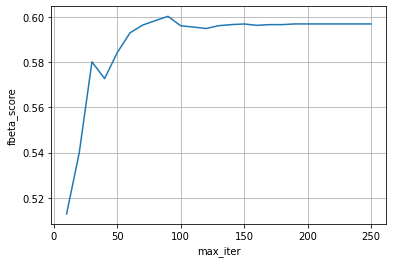

In [52]:
f1_scores = []
iters = np.arange(10, 251, 10)
for i in iters:
  log_reg = LogisticRegression(max_iter=i)
  log_reg.fit(X_train, y_train)

  y_pred = log_reg.predict(X_test)
  f1_scores.append(f1_score(y_test, y_pred, average = 'macro'))

plt.plot(iters, f1_scores)
plt.xlabel('max_iter')
plt.ylabel('fbeta_score')
plt.grid()
plt.show()

Отсюда видно, что **примерно с max_iter = 130 значения почти не изменяются**. \
Также **есть небольшое повышение точности в max_iter = 90**.

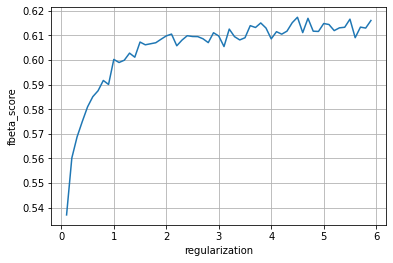

In [53]:
f1_scores = []
regularization = np.arange(0.1, 6, 0.1)
for i in regularization:
  log_reg = LogisticRegression(max_iter=90, C = i)
  log_reg.fit(X_train, y_train)

  y_pred = log_reg.predict(X_test)
  f1_scores.append(f1_score(y_test, y_pred, average = 'macro'))

plt.plot(regularization, f1_scores)
plt.xlabel('regularization')
plt.ylabel('fbeta_score')
plt.grid()
plt.show()

График показывает, что **увеличение коэффициента С дает улучшение результата примерно до С = 4.5**

Попробуем также разные солверы:

In [54]:
log_reg = LogisticRegression(max_iter=90, C = 4.5)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
f1_score(y_test, y_pred, average = 'macro')

0.6174174234977801

In [55]:
log_reg = LogisticRegression(max_iter=90, C = 4.5, solver = 'newton-cg')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
f1_score(y_test, y_pred, average = 'macro')

0.6168822923638049

In [56]:
log_reg = LogisticRegression(max_iter=90, C = 4.5, solver = 'saga')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
f1_score(y_test, y_pred, average = 'macro')

0.6168822923638049

Таким образом, лучший результат показала модель с изменением коэффициента регуляризации (С = 4.5) а также небольшое преимущество дала фиксация параметра max_iter = 90 \
**f1_score = 0.6174**

### Можно ли добиться такого (или более высокого) результата с KNN?

In [57]:
print('KNN f1_score: ', f1_score(y_test, y_pred_knn, average = 'macro'))

KNN f1_score:  0.5611066294509887


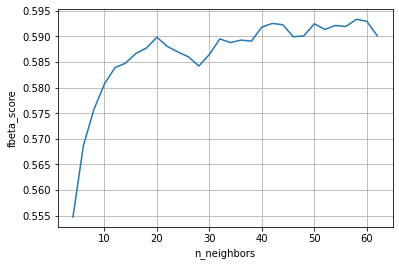

In [58]:
# сначала попробуем подобрать число соседей
f1s = []
neigh = np.arange(4, 64, 2)
for i in neigh:
  KNN = KNeighborsClassifier(n_neighbors=i, leaf_size=150)
  KNN.fit(X_train, y_train)

  y_pred = KNN.predict(X_test)
  f1s.append(f1_score(y_test, y_pred, average= 'macro'))

plt.plot(neigh, f1s)
plt.xlabel('n_neighbors')
plt.ylabel('fbeta_score')
plt.grid()
plt.show()

Из графика видно, что **увеличение числа соседей до 40-45 дало улучшение результата**, но при дальнейшем увеличении такого же сильного роста не происходит, так что можно считать это нецелесообразным.

Небольшое улучшение также дает добавление весов расстояниям до соседей:

In [59]:
KNN = KNeighborsClassifier(leaf_size=150, weights = 'distance', n_neighbors = 45)
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)
f1_score(y_test, y_pred, average = 'macro')

0.6000198135934764

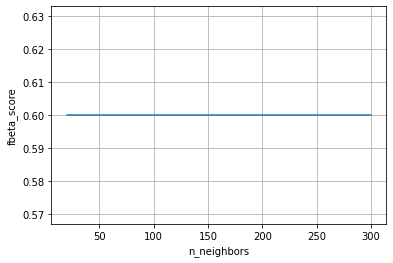

In [60]:
# также попробуем подобрать число листьев
f1s = []
leafs = np.arange(20, 301, 10)
for i in leafs:
  KNN = KNeighborsClassifier(n_neighbors=45, weights = 'distance', leaf_size=i)
  KNN.fit(X_train, y_train)

  y_pred = KNN.predict(X_test)
  f1s.append(f1_score(y_test, y_pred, average= 'macro'))

plt.plot(leafs, f1s)
plt.xlabel('n_neighbors')
plt.ylabel('fbeta_score')
plt.grid()
plt.show()

А этот показатель оказался не влияющим на результат

Таким образом, лучший результата KNN модели достигается при увеличении числа соседей (до 40-45), а также введении весов в расстояния до соседей. \
**Получили f1_score = 0.6**

**Таким образом, LogReg модель в данной ситуации дала немного более лучшие результаты, чем KNN, однако на самом деле оба этих результата невелики.**